In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Traitement des données

In [ ]:
# fonction pour convertir les températures en celcius
def celcius(far):
    return (far-32)*5/9

In [ ]:
# chager les données
df_temperatures = pd.read_csv('../temperatures.csv')
# supprimer les valeurs -99 et les remplacer par des valeurs d'interpolation
df_temperatures = df_temperatures.replace(-99, np.nan).interpolate()
# convertir les valeurs des températures en celcius
df_temperatures['AvgTemperature'] = (df_temperatures['AvgTemperature']).apply(celcius)



<AxesSubplot:xlabel='count', ylabel='Region'>

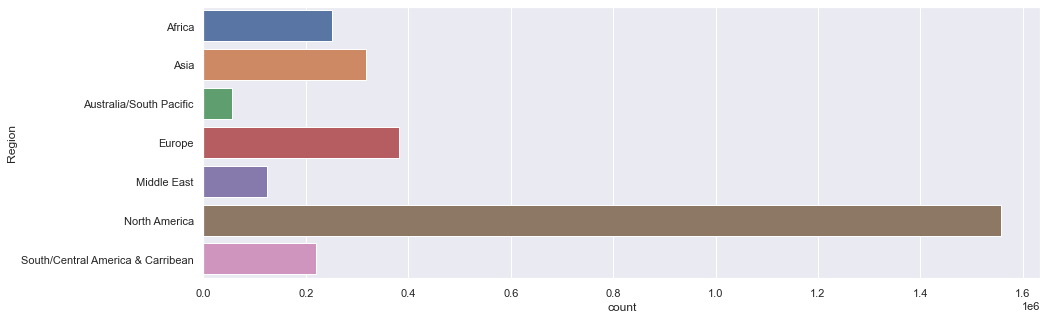

In [98]:
sns.set()
plt.figure(figsize=(15,5))
sns.countplot(y = "Region", data= df_temperatures)

In [ ]:
# concaténation des colonnes Month, Day et Year en une colonne 'Date'
df_temperatures["Date"]=df_temperatures['Month'].map(str)+"-"+ df_temperatures['Day'].map(str)+"-"+df_temperatures['Year'].map(str)
# changer le type de la colonne 'Date' to datetime
df_temperatures['Date']= pd.to_datetime(df_temperatures ['Date'], errors = 'coerce' )


## Requête 1: les températures moyennes françaises de 1995 à 2019

In [ ]:
# mettre des filtres sur 'Country et 'Year'
temperatures_France = df_temperatures.loc[(df_temperatures['Country']=="France"),:]
temperatures_France = temperatures_France.loc[(temperatures_France['Year']> 1994)|(temperatures_France['Year']< 2020), :] 
#groupby "Year"
Temp_MoyFrance = temperatures_France.groupby("Year")['AvgTemperature'].mean()



In [ ]:
#groupby "Year"
Temp_MoyFrance = temperatures_France.groupby("Year")['AvgTemperature'].mean()



<function matplotlib.pyplot.show(close=None, block=None)>

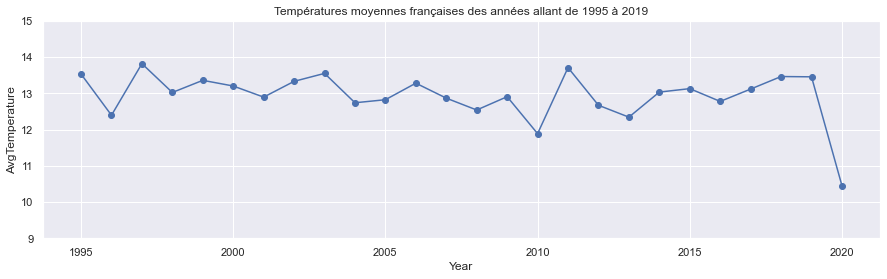

In [15]:

plt.figure(figsize =(15,4))
Temp_MoyFrance.plot(ylim=(9,15) ,marker="o", label ="Temperature")
plt.xlabel("Year")
plt.ylabel("AvgTemperature")
# plt.legend()
    
plt.title('Températures moyennes françaises des années allant de 1995 à 2019')
plt.show

## Requête 2: l'évolution moyenne de la température chaque mois de l'année de chaque région du globe

In [41]:
df_temperatures = df_temperatures.loc[(df_temperatures['Year']> 1994)|(df_temperatures['Year']< 2020), :] 

In [42]:
#groupby Region
Temp_Africa = df_temperatures.groupby("Region").get_group("Africa")
#
Temp_Asia = df_temperatures.groupby("Region").get_group("Asia")
#
Temp_Aus_pacific = df_temperatures.groupby("Region").get_group("Australia/South Pacific")
#
Temp_Europe = df_temperatures.groupby("Region").get_group("Europe")
#
Temp_MiddleEast = df_temperatures.groupby("Region").get_group("Middle East")
#
Temp_NorthAmerica = df_temperatures.groupby("Region").get_group("North America")
#
Temp_Carribean = df_temperatures.groupby("Region").get_group("South/Central America & Carribean")



In [55]:
# la température moyenne de chaque mois sur toutes les années pour chaque région 
Temp_Africa = Temp_Africa.groupby('Month')['AvgTemperature'].mean()
#
Temp_Asia = Temp_Asia.groupby('Month')['AvgTemperature'].mean()
# 
Temp_Aus_pacific =Temp_Aus_pacific.groupby('Month')['AvgTemperature'].mean()
#
Temp_Europe = Temp_Europe.groupby('Month')['AvgTemperature'].mean()
 #
Temp_MiddleEast= Temp_MiddleEast.groupby('Month')['AvgTemperature'].mean()
 #
Temp_NorthAmerica = Temp_NorthAmerica.groupby('Month')['AvgTemperature'].mean()
#
Temp_Carribean = Temp_Carribean.groupby('Month')['AvgTemperature'].mean()

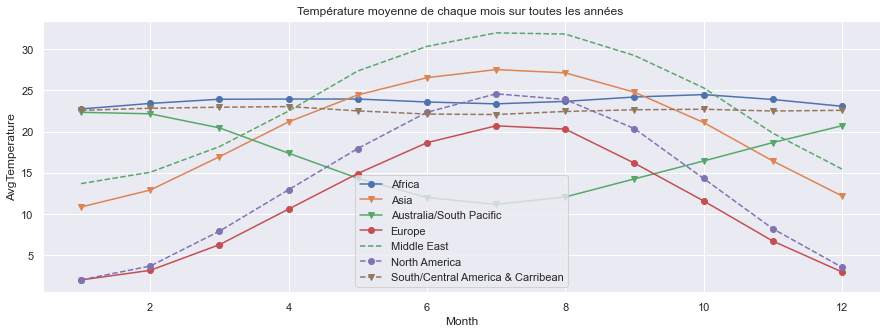

In [85]:
# les graphes représentant la température moyenne de chaque mois sur toutes les années 
fig = plt.figure(figsize=(15, 5))
gr_africa = Temp_Africa.plot(marker="o", label = "Africa")
gr_asia = Temp_Asia.plot(marker="v", label = "Asia")
gr_pacific = Temp_Aus_pacific.plot(marker="v", label = "Australia/South Pacific") 
gr_europe =Temp_Europe.plot(marker="o", label = "Europe") 
gr_MiddleEast =Temp_MiddleEast.plot(style='g--', label = "Middle East") 
gr_NoAmerica = Temp_NorthAmerica.plot(style='o--', label = "North America")
gr_car = Temp_Carribean.plot(style='v--', label = "South/Central America & Carribean") 
plt.xlabel("Month")
plt.ylabel("AvgTemperature")
plt.title('Température moyenne de chaque mois sur toutes les années ')
plt.legend() 

## Requête 3: le classement graphique des pays les plus chauds au monde

In [106]:
# groupby 'Country'
df_paysChaud = df_temperatures.groupby('Country')['AvgTemperature'].mean().reset_index()        
# classement des températures dans l'ordre décroissant
df_paysChaud = df_paysChaud.sort_values('AvgTemperature', ascending = False)
df_paysChaud= df_paysChaud[['Country', 'AvgTemperature']][0:15 ] 


Text(0.5, 1.0, 'classement des pays les plus chauds au monde')

<Figure size 1440x360 with 0 Axes>

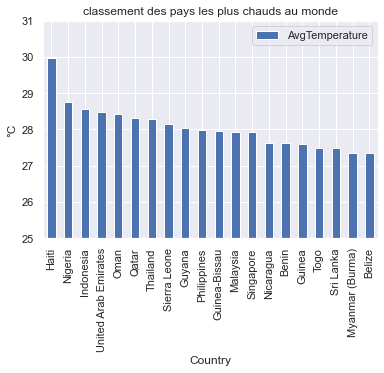

In [114]:
#graphe
plt.figure(figsize =(20,5))
ax = df_paysChaud.plot(kind = 'bar', x = 'Country', ylim=(25,31), ylabel='°C')
plt.title('classement des pays les plus chauds au monde')


## Requête 4: le classement graphique des pays les plus froids

In [118]:
# groupby 'Country'
df_paysFroid = df_temperatures.groupby('Country')['AvgTemperature'].mean().reset_index()        
# classement des températures dans l'ordre croissant
df_paysFroid = df_paysFroid.sort_values('AvgTemperature')
df_paysFroid= df_paysFroid[['Country', 'AvgTemperature']][0:15 ] 

Text(0.5, 1.0, 'classement des pays les plus froids au monde')

<Figure size 1440x360 with 0 Axes>

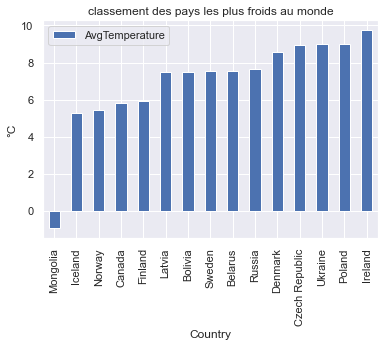

In [119]:
#graphe
plt.figure(figsize =(20,5))
ax = df_paysFroid.plot(kind = 'bar', x = 'Country',  ylabel='°C')
plt.title('classement des pays les plus froids au monde')

### Requête 5: l'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019

In [127]:
pays_plus_chaud = df_temperatures.loc[(df_temperatures['Country'] == "Haiti"),:]
#
pays_plus_froid = df_temperatures.loc[(df_temperatures['Country'] == "Mongolia"),:]
#

In [128]:
pays_plus_chaud = pays_plus_chaud.groupby("Year")["AvgTemperature"].mean()
#
pays_plus_froid = pays_plus_froid.groupby("Year")["AvgTemperature"].mean()

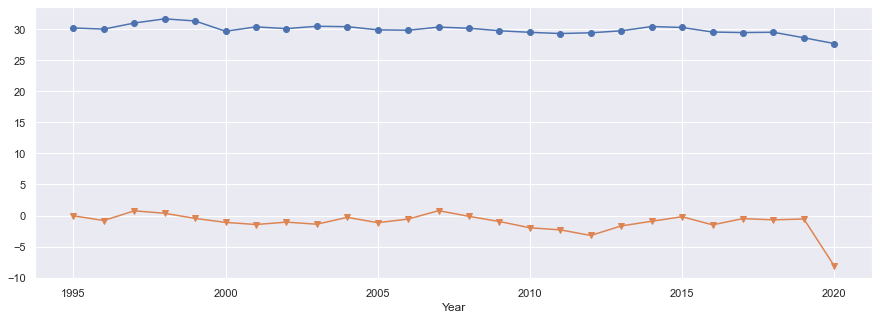

In [129]:
fig = plt.figure(figsize=(15, 5))
gr_pays_chaud = pays_plus_chaud.plot(marker="o", label = "Haiti")
gr_plus_froid = pays_plus_froid.plot(marker="v", label = "Mongolia")

## Reqête 6: l'évolution de la température moyenne de la ville de paris

In [121]:
temp_paris = temperatures_France.loc[(temperatures_France['City']=="Paris"),:]
#groupby Year
temp_paris = temp_paris.groupby('Year')['AvgTemperature'].mean()

Text(0.5, 1.0, 'Lévolution de la température moyenne de la ville de paris')

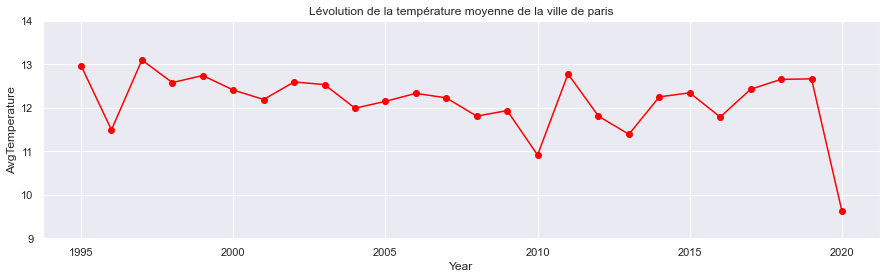

In [123]:
plt.figure(figsize =(15,4))
temp_paris.plot(ylim=(9,14), marker="o", style='red', label ="Temperature")
plt.xlabel("Year")
plt.ylabel("AvgTemperature")
plt.title('L' 'évolution de la température moyenne de la ville de paris')

## Requête 7: la température moyenne de chaque pyas sur la période de 2010_2019

In [131]:
Temp_Moy_Country = df_temperatures.groupby("Country")["AvgTemperature"].mean()

In [133]:
#plt.subplots(figsize =(10,10))
# wedges,_,_ =ax.pie(Temp_Moy_Country['AvgTemperature'],labels = Temp_Moy_Country['Country'], startangle =90)
#Temp_Moy_Country.plot(kind = 'pie', labels=['Country'])